#### Clone the repository

In [79]:
# !git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git

#### Prepare datasets

In [94]:
import os 

directory = 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'
file_paths = []

for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        file_paths.append(os.path.join(dirname, filename))

pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt
pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt
pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt


In [95]:
def load_txt_file(file_path):
    with open(file_path, 'r') as f:
        return f.readlines()

In [96]:
train_article = load_txt_file(file_paths[2])
test_article = load_txt_file(file_paths[1])
val_abstract = load_txt_file(file_paths[0])

In [97]:
def process_data(content):
    abstract = []
    line_count = 0
    processed_data = []
    for line in content:
        if line.startswith('###'):
            abstract_id = line[3:-1]
        elif not line.isspace():
            line_count += 1
            splitted_line = line.split('\t')
            target = splitted_line[0]
            text = splitted_line[1][:-1]
            line_number = line_count
            abstract.append({'id': abstract_id, 'line_number': line_number, 'target': target, 'text': text})
        elif line.isspace():
            for dictionary in abstract:
                dictionary['total_lines'] = line_count
                processed_data.append(dictionary)    
            abstract = []
            line_count = 0
    return processed_data
                

In [98]:
%%time
train_samples = process_data(train_article)
val_samples = process_data(val_abstract)
test_samples = process_data(test_article)

CPU times: total: 1.78 s
Wall time: 1.9 s


In [99]:
import pandas as pd
df_train = pd.DataFrame(train_samples)
df_val = pd.DataFrame(val_samples)
df_test = pd.DataFrame(test_samples) 

In [100]:
df_train

,id,line_number,target,text,total_lines
0,24293578,1,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,12
1,24293578,2,METHODS,A total of @ patients with primary knee OA wer...,12
2,24293578,3,METHODS,Outcome measures included pain reduction and i...,12
3,24293578,4,METHODS,Pain was assessed using the visual analog pain...,12
4,24293578,5,METHODS,Secondary outcome measures included the Wester...,12
...,...,...,...,...,...
180035,26227186,8,RESULTS,For the absolute change in percent atheroma vo...,12
180036,26227186,9,RESULTS,"For PAV , a significantly greater percentage o...",12
180037,26227186,10,RESULTS,Both strategies had acceptable side effect pro...,12
180038,26227186,11,CONCLUSIONS,"Compared with standard statin monotherapy , th...",12


In [101]:
df_train['target'].value_counts()

target
METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

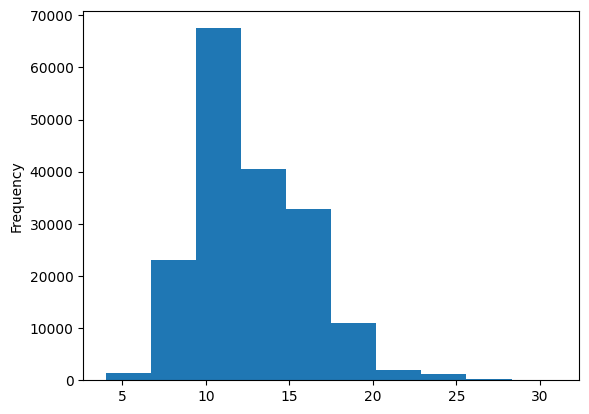

In [102]:
df_train['total_lines'].plot.hist()

#### Get list in to lists

In [103]:
df_train['text'].to_list()

['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .',
 'Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .',
 'There was a clinic